# Assingment 08

### RaviKiran Bhat
### Rubanraj RaviChandran
### Ramesh Kumar

# Exercise 3

Tasks: 


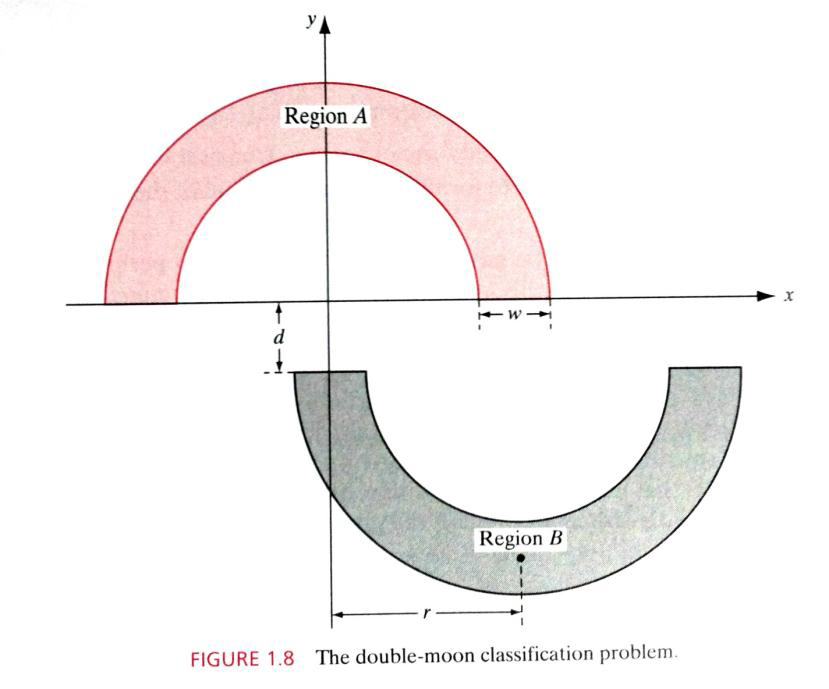

In [9]:
Image(filename='fig2.png')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import Image
from sklearn import svm
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
class StateVectorMachine:
    
    def __init__(self,_radius,_width,_distance,_num_of_training_set,
                 _num_of_testing_set):
        self.radius = _radius
        self.width = _width
        self.distance = _distance
        self.num_of_training_set = _num_of_training_set
        self.num_of_testing_set = _num_of_testing_set
        
        
    def generate_sample(self,_class):
        random_theta = np.pi *  random.random()
        random_r = (self.width*random.random())+(self.radius-self.width)
        #Region one
        if _class is 1:
            x = random_r*np.cos(random_theta)
            y = random_r*np.sin(random_theta) 
            return [x,y,1]
        else:
            #Region two
            random_theta += np.pi
            x = random_r*np.cos(random_theta)+(self.radius-(self.width/2.0))
            y = random_r*np.sin(random_theta)-self.distance
            return [x,y,2]
        
    def get_samples(self,_flag):
        samples = np.empty((0,3))
        
        if _flag is "train":
            _no_of_samples = self.num_of_training_set
        else:
            _no_of_samples = self.num_of_testing_set
        
        """
        - generating number of samples 
        - half samples belongs to region A and 
          remaining half samples belongs to region B
        """
        for i in range(_no_of_samples):
            sample = self.generate_sample(1 if (i<_no_of_samples/2) else 2)
            samples = np.vstack([samples,sample])
        
        #returning samples and desired output
        return samples[:,0:2],samples[:,2:3]
    
    def plot(self,points,output,title):
        plt.grid(True)
        plt.title(title)
        plt.xlabel("x-->")
        plt.ylabel("y-->")
        for index,point in enumerate(points):
            if (output[index] == 1.0):
                plt.plot(point[0],point[1],'r+',label='region a')
            else:
                plt.plot(point[0],point[1],'b+',label='region b')

    
    def get_center_of_cluster(self, X, k):
        
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        return kmeans, kmeans.cluster_centers_
        
    
    def compute_variance(self, x):
        
        kmeans, mu = self.get_center_of_cluster(x, 6)
        avg_sq = np.zeros((6,2))
        count = np.zeros(6)
        variance = np.zeros((6,2))
        var = np.zeros(6)
        
        kmeans_labels = kmeans.labels_
        for idx in range(6):
            dists = []
            for i in range(len(x)):
                if kmeans_labels[i] == idx:
                    dists.append(np.linalg.norm(x[i] - mu[kmeans_labels[i]]))
            dists = np.asarray(dists)
            var[idx] = np.var(dists)
            
#         for i in range(len(x)):         
#             kmeans_labels = kmeans.labels_
#             avg_sq[kmeans_labels[i]] += (x[i] - mu[kmeans_labels[i]])**2
#             count[kmeans_labels[i]] += 1
            
#         for i in range(len(avg_sq)):    
#             variance[i] = avg_sq[i]/count[i]
            
        #print "variance ", variance
        print "centers ", mu
        print "var",var
        return var

# Case1: d = 1.0

In [3]:
radius = 10.0
width = 6.0
distance = 1.0
num_of_training_samples = 1000
num_of_testing_samples = 3000

state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)
training_input,desired_output = state_vector_machine.get_samples("train")
variance = state_vector_machine.compute_variance(training_input)

variances_over_d = np.array(variance)

centers  [[  1.29073189e+01  -4.05499219e+00]
 [  4.34922815e-04   6.71002110e+00]
 [  1.04468487e+00  -4.61310488e+00]
 [ -5.50340468e+00   3.16874308e+00]
 [  5.54316563e+00   3.41015612e+00]
 [  7.05864261e+00  -7.52042260e+00]]
var [ 0.94685936  1.01893854  0.84468396  0.93555976  1.04838778  0.94764608]


# Case2: d = 0.0

In [4]:
distance = 0.0
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)
variance = state_vector_machine.compute_variance(training_input)
variances_over_d = np.row_stack((variances_over_d,variance))

centers  [[  5.54316563e+00   3.41015612e+00]
 [  1.29073189e+01  -4.05499219e+00]
 [ -5.50340468e+00   3.16874308e+00]
 [  1.04468487e+00  -4.61310488e+00]
 [  7.05864261e+00  -7.52042260e+00]
 [  4.34922815e-04   6.71002110e+00]]
var [ 1.04838778  0.94685936  0.93555976  0.84468396  0.94764608  1.01893854]


# case3: d = -1.0

In [5]:
distance = -1.0
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)
variance = state_vector_machine.compute_variance(training_input)
variances_over_d = np.row_stack((variances_over_d,variance))

centers  [[  4.34922815e-04   6.71002110e+00]
 [  1.04468487e+00  -4.61310488e+00]
 [  1.29073189e+01  -4.05499219e+00]
 [  5.54316563e+00   3.41015612e+00]
 [ -5.50340468e+00   3.16874308e+00]
 [  7.05864261e+00  -7.52042260e+00]]
var [ 1.01893854  0.84468396  0.94685936  1.04838778  0.93555976  0.94764608]


# case4: d = -2.0

In [6]:
distance = -2.0
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)
variance = state_vector_machine.compute_variance(training_input)
variances_over_d = np.row_stack((variances_over_d,variance))

centers  [[  5.54316563e+00   3.41015612e+00]
 [  7.05864261e+00  -7.52042260e+00]
 [ -5.50340468e+00   3.16874308e+00]
 [  1.29073189e+01  -4.05499219e+00]
 [  1.04468487e+00  -4.61310488e+00]
 [  4.34922815e-04   6.71002110e+00]]
var [ 1.04838778  0.94764608  0.93555976  0.94685936  0.84468396  1.01893854]


# case5: d = -3.0

In [7]:
distance = -3.0
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)
variance = state_vector_machine.compute_variance(training_input)
variances_over_d = np.row_stack((variances_over_d,variance))

centers  [[  1.04468487e+00  -4.61310488e+00]
 [  4.34922815e-04   6.71002110e+00]
 [  1.29073189e+01  -4.05499219e+00]
 [  5.54316563e+00   3.41015612e+00]
 [  7.05864261e+00  -7.52042260e+00]
 [ -5.50340468e+00   3.16874308e+00]]
var [ 0.84468396  1.01893854  0.94685936  1.04838778  0.94764608  0.93555976]


# case6 d = -4.0

In [8]:
distance = -4.0
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)
variance = state_vector_machine.compute_variance(training_input)
variances_over_d = np.row_stack((variances_over_d,variance))

centers  [[  5.54316563e+00   3.41015612e+00]
 [ -5.50340468e+00   3.16874308e+00]
 [  1.29073189e+01  -4.05499219e+00]
 [  7.05864261e+00  -7.52042260e+00]
 [  4.34922815e-04   6.71002110e+00]
 [  1.04468487e+00  -4.61310488e+00]]
var [ 1.04838778  0.93555976  0.94685936  0.94764608  1.01893854  0.84468396]


# case7 d= -5.0

In [9]:
distance = -5.0
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)
variance = state_vector_machine.compute_variance(training_input)
variances_over_d = np.row_stack((variances_over_d,variance))

centers  [[  7.05864261e+00  -7.52042260e+00]
 [ -5.50340468e+00   3.16874308e+00]
 [  1.29073189e+01  -4.05499219e+00]
 [  5.54316563e+00   3.41015612e+00]
 [  1.04468487e+00  -4.61310488e+00]
 [  4.34922815e-04   6.71002110e+00]]
var [ 0.94764608  0.93555976  0.94685936  1.04838778  0.84468396  1.01893854]


# case8: d = -6.0

In [29]:
distance = -6.0
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)
variance = state_vector_machine.compute_variance(training_input)
variances_over_d = np.row_stack((variances_over_d,variance))

centers  [[  7.05864261e+00  -7.52042260e+00]
 [ -5.50340468e+00   3.16874308e+00]
 [  5.54316563e+00   3.41015612e+00]
 [  1.29073189e+01  -4.05499219e+00]
 [  4.34922815e-04   6.71002110e+00]
 [  1.04468487e+00  -4.61310488e+00]]
var [ 0.94764608  0.93555976  1.04838778  0.94685936  1.01893854  0.84468396]


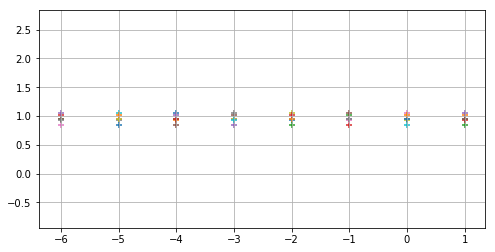

In [28]:
d = [1,0,-1,-2,-3,-4,-5,-6]
fig, ax = plt.subplots(figsize=(8,4))
ax.axis('equal')
ax.grid()
for i,val in enumerate(variances_over_d):
    for var in val:
        ax.scatter(d[i],var, marker='+')

